In [1]:
import numpy as np
import pandas as pd
import psycopg2

In [2]:
import json

with open('config.json') as f:
    conf = json.load(f)
    host = conf['host']
    database = conf['database']
    user = conf['user']
    passw = conf['passw']

In [3]:
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)
conn = psycopg2.connect(conn_str)

In [4]:
query = '''
SELECT      DISTINCT inc.incident_id,
            date_part('year',inc.incident_date),
            vic.age_num,
            vic.sex_code AS VICTIM_SEX,
            oft.offense_category_name AS OFFENSE_CATEGORY,
            ori.countyname AS COUNTY
            
FROM        nibrs_victim as vic
JOIN        nibrs_offense as off
ON          off.incident_id = vic.incident_id
JOIN        nibrs_offense_type as oft
ON          oft.offense_type_id = off.offense_type_id
JOIN        nibrs_incident as inc
ON          inc.incident_id = vic.incident_id
JOIN        cde_agencies as ags
ON          ags.agency_id = inc.agency_id
JOIN        ori_to_fips as ori
ON          ori.ori9 = ags.ori

WHERE       vic.victim_type_id = 4
AND         inc.incident_date BETWEEN '2016-01-01' AND '2016-12-31';
'''

In [5]:
df = pd.read_sql(query, con=conn)
df.head(3).T

,0,1,2
incident_id,87264241,87264244,87264248
date_part,2016,2016,2016
age_num,59,50,26
victim_sex,F,M,F
offense_category,Larceny/Theft Offenses,Fraud Offenses,Larceny/Theft Offenses
county,BURNET,BURNET,BURNET


In [6]:
age_df = df[['victim_sex','age_num']]

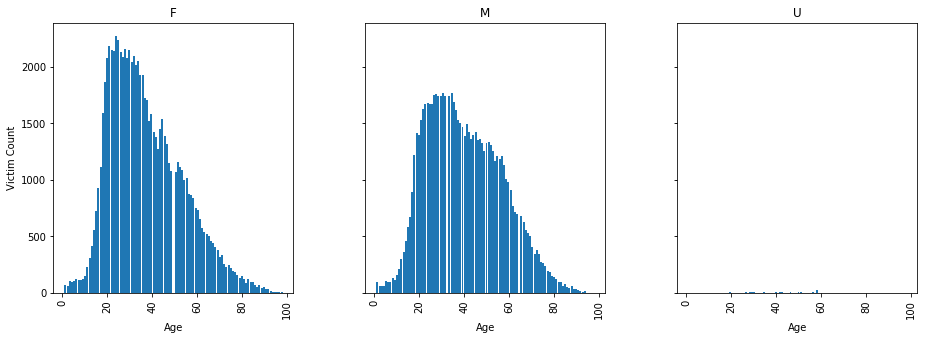

In [23]:
age_df.columns = ['victim_sex','age_num']

axarr = age_df.hist(column='age_num', by ='victim_sex', bins=99, rwidth=0.9, sharex=True, sharey=True, layout = (1, 3), figsize=(15,5))

for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Victim Count")

In [9]:
off_df = df[['victim_sex','offense_category']]

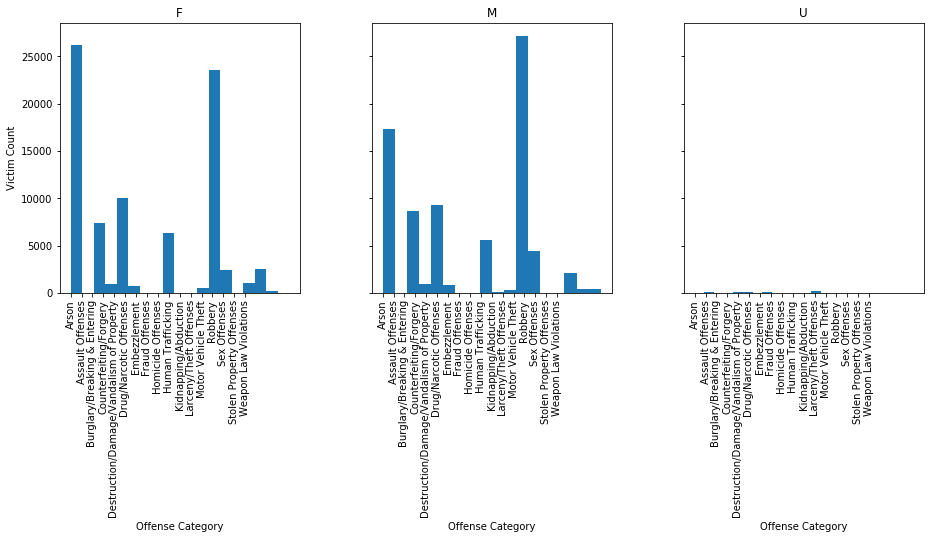

In [24]:
off_df.columns = ['victim_sex','offense_category']

axarr = off_df.hist(column='offense_category', by = 'victim_sex', bins=18, sharex=True, sharey=True, layout = (1, 3), figsize=(15,5))

for ax in axarr.flatten():
    ax.set_xlabel("Offense Category")
    ax.set_ylabel("Victim Count")

In [11]:
df['victim_sex'].value_counts()

F    82116
M    77780
U      920
Name: victim_sex, dtype: int64

In [14]:
df['offense_category'].unique()

array(['Larceny/Theft Offenses', 'Fraud Offenses', 'Assault Offenses',
       'Destruction/Damage/Vandalism of Property',
       'Burglary/Breaking & Entering', 'Counterfeiting/Forgery',
       'Motor Vehicle Theft', 'Robbery', 'Drug/Narcotic Offenses',
       'Sex Offenses', 'Extortion/Blackmail', 'Weapon Law Violations',
       'Kidnapping/Abduction', 'Homicide Offenses',
       'Pornography/Obscene Material', 'Arson',
       'Stolen Property Offenses', 'Embezzlement', 'Human Trafficking',
       'Bribery', 'Prostitution Offenses'], dtype=object)

In [15]:
df.groupby(['victim_sex','offense_category']).incident_id.agg('count')

victim_sex  offense_category                        
F           Arson                                         111
            Assault Offenses                            26105
            Bribery                                         2
            Burglary/Breaking & Entering                 7422
            Counterfeiting/Forgery                        947
            Destruction/Damage/Vandalism of Property     9988
            Drug/Narcotic Offenses                        718
            Embezzlement                                   26
            Extortion/Blackmail                            19
            Fraud Offenses                               6344
            Homicide Offenses                              52
            Human Trafficking                              17
            Kidnapping/Abduction                          512
            Larceny/Theft Offenses                      23535
            Motor Vehicle Theft                          2428
            Porno